In [7]:
import keras
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt


In [8]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [10]:
#understanding the format of the image:
X_train[0].shape

(28, 28)

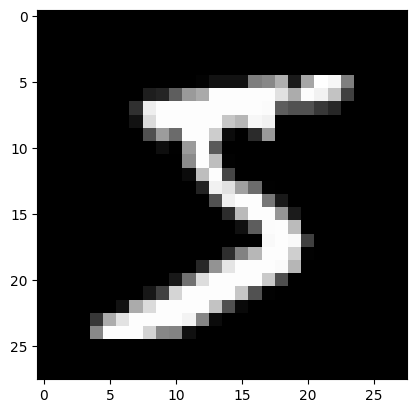

In [13]:
plt.imshow(X_train[0],cmap="gray")

In [14]:
y_train[0]

5

In [15]:
#now, preprocessiong the images
image_height,image_width=28,28

In [17]:
X_train=X_train.reshape(60000,image_height*image_width)
X_test=X_test.reshape(10000,image_height*image_width)

In [18]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [19]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [20]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [23]:
X_train/=255.0
X_test/=255.0

In [24]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [25]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [26]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [27]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Now building the model


In [28]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation="softmax"))

In [29]:
#compilation
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
history=model.fit(X_train,y_train,epochs=40,validation_data=(X_test,y_test))

Epoch 1/40
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1835 - accuracy: 0.9436 - val_loss: 2.3328 - val_accuracy: 0.0892
Epoch 2/40
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0790 - accuracy: 0.9754 - val_loss: 2.3546 - val_accuracy: 0.0892
Epoch 3/40
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0566 - accuracy: 0.9815 - val_loss: 2.3882 - val_accuracy: 0.0892
Epoch 4/40
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0431 - accuracy: 0.9858 - val_loss: 2.4474 - val_accuracy: 0.0892
Epoch 5/40
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0339 - accuracy: 0.9890 - val_loss: 2.4204 - val_accuracy: 0.0892
Epoch 6/40
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0291 - accuracy: 0.9905 - val_loss: 2.4577 - val_accuracy: 0.0974
Epoch 7/40
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0249 - accuracy: 0.9929 - val_loss: 2.4473 -

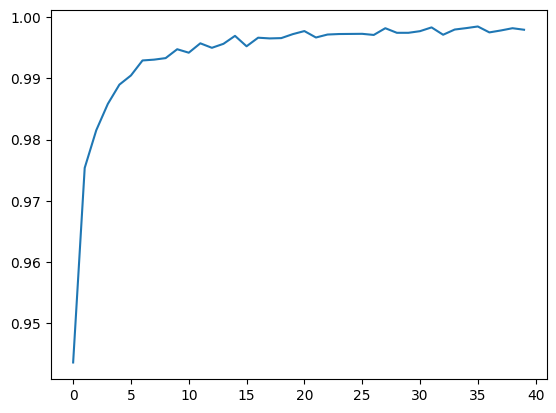

In [32]:
plt.plot(history.history['accuracy'])

In [31]:
#Evaluation
score=model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 3.0244 - accuracy: 0.0892


doing convolution and maxpooling on the model

In [34]:
from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [35]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [37]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [38]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [39]:
X_train/=255.0
X_test/=255.0

In [40]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


**CNN** **Model** **Development**

In [45]:
cnn=Sequential()
cnn.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),padding='same',activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [47]:
history_cnn=cnn.fit(X_train,y_train,epochs=20,verbose=1,validation_data=(X_train,y_train))

Epoch 1/20
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0411 - accuracy: 0.9867 - val_loss: 0.0311 - val_accuracy: 0.9898
Epoch 2/20
1875/1875 [==============================] - 139s 74ms/step - loss: 0.0268 - accuracy: 0.9916 - val_loss: 0.0154 - val_accuracy: 0.9951
Epoch 3/20
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0200 - accuracy: 0.9935 - val_loss: 0.0241 - val_accuracy: 0.9917
Epoch 4/20
1875/1875 [==============================] - 129s 69ms/step - loss: 0.0142 - accuracy: 0.9954 - val_loss: 0.0091 - val_accuracy: 0.9971
Epoch 5/20
1875/1875 [==============================] - 87s 46ms/step - loss: 0.0109 - accuracy: 0.9966 - val_loss: 0.0087 - val_accuracy: 0.9971
Epoch 6/20
1875/1875 [==============================] - 91s 49ms/step - loss: 0.0096 - accuracy: 0.9967 - val_loss: 0.0073 - val_accuracy: 0.9974
Epoch 7/20
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0077 - accuracy: 0.9975 - val_loss: 0.008

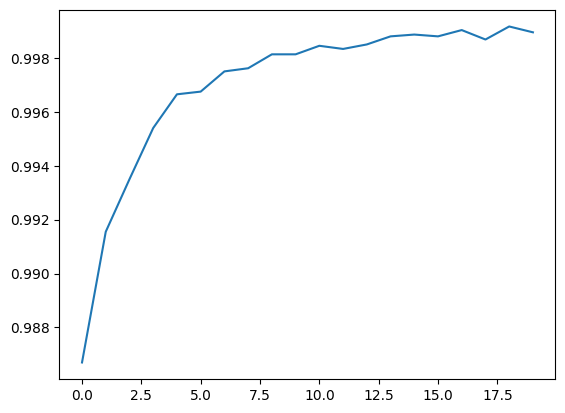

In [48]:
plt.plot(history_cnn.history['accuracy'])

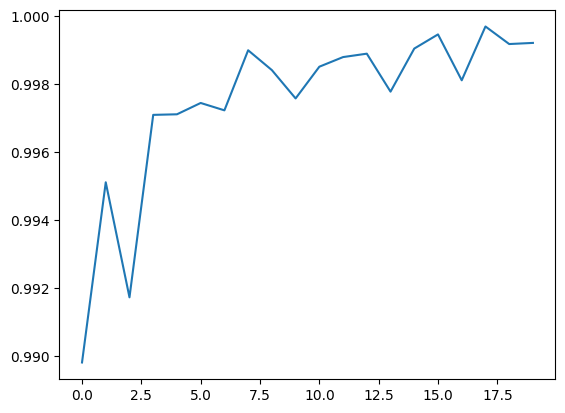

In [49]:
plt.plot(history_cnn.history['val_accuracy'])

**Using** **OpenCV** **for** **Image** **Processing**

In [50]:
import cv2
from matplotlib import pyplot
import numpy

In [59]:
panda_img=cv2.imread(r"panda_img")
type(panda_img)

numpy.ndarray

In [60]:
height,width,channels=panda_img.shape

In [61]:
print(height)
print(width)
print(channels)

168
300
3


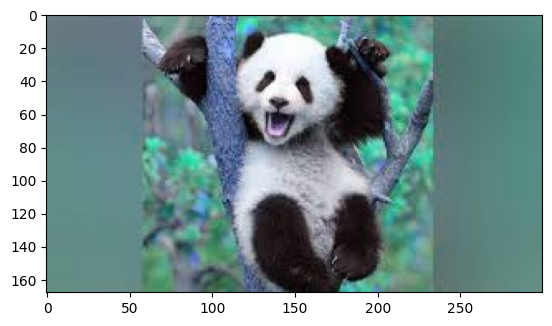

In [62]:
plt.imshow(panda_img)

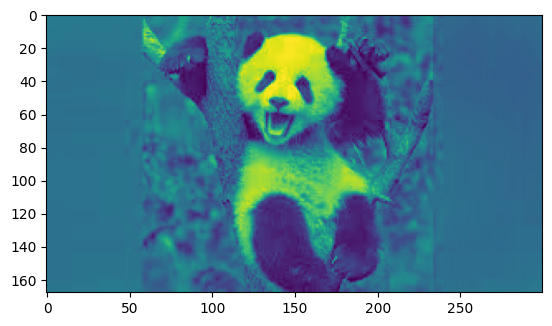

In [63]:
b,g,r=cv2.split(panda_img)
plt.imshow(b)

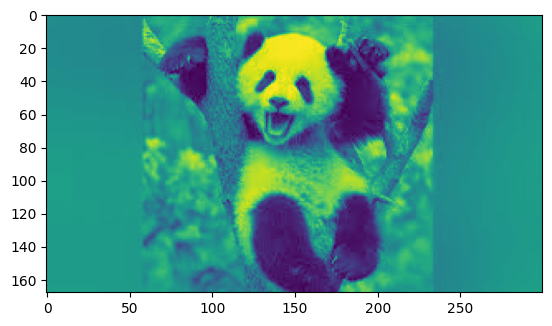

In [70]:
plt.imshow(g)

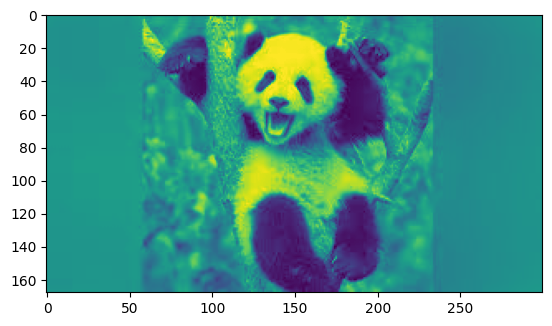

In [71]:
plt.imshow(r)

In [73]:
panda_img_temp=cv2.imread(r"panda_img")

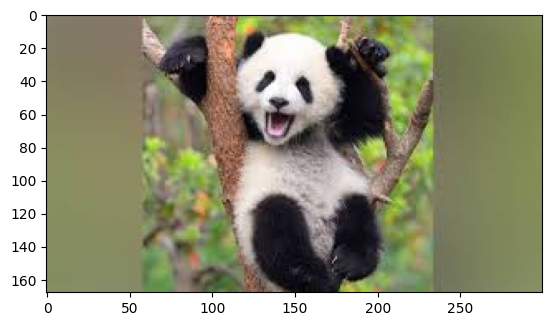

In [74]:
panda_img=cv2.cvtColor(panda_img_temp,cv2.COLOR_BGR2RGB)
plt.imshow(panda_img)

In [80]:
panda_img=cv2.imread(r"panda_img")
cv2.imwrite(r"panda_opencv.png",panda_img)

True